In [5]:
%matplotlib inline
from config_calc import *
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import cmocean
import colorbrewer
import plot_tools

from config_calc import *
from proc_cesm_le import open_ens
                                     

In [6]:
varlist = ['O2','AOU','IAGE','O2_CONSUMPTION','O2_PRODUCTION']
op = 'ann_dft_aavg'

#-- read datasets
tr85 = open_ens('tr85',op,varlist)
tr45 = open_ens('tr85',op,varlist)

#-- compute derived
v = 'O2sat'
tr85[v] = tr85['AOU'] + tr85['O2']
tr45[v] = tr45['AOU'] + tr45['O2']
varlist.append(v)  
tr85

<xarray.Dataset>
Dimensions:         (ens: 33, nlat: 384, nlon: 320, time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Dimensions without coordinates: ens, nlat, nlon, time
Data variables:
    KMT             (ens, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA           (ens, nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 ...
    TLAT            (ens, nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 ...
    TLONG           (ens, nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 ...
    UAREA           (ens, nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT            (ens, nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 ...
    ULONG           (ens, nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 ...
    dz              (

### compute ensemble mean

In [7]:
tr85a = tr85.mean(dim='ens')
tr85a

<xarray.Dataset>
Dimensions:         (nlat: 384, nlon: 320, time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Dimensions without coordinates: nlat, nlon, time
Data variables:
    KMT             (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA           (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 ...
    TLAT            (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG           (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 ...
    UAREA           (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT            (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG           (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 326.8 ...
    dz              (z_t) float64 1e

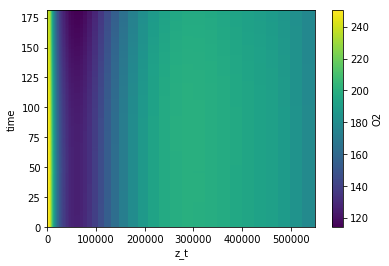

In [8]:
tr85a.O2.plot()

In [9]:
baseline = tr85a.isel(time=slice(0,20)).mean(dim='time')
baseline

<xarray.Dataset>
Dimensions:         (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
  * z_t_150m        (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w             (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    KMT             (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA           (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 ...
    TLAT            (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG           (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 ...
    UAREA           (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT            (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG           (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 326.8 ...
    dz              (z_t) float64 1e+03 1e+03 1e+03 1

In [24]:
delta = tr85a - baseline
delta = delta.drop([k for k in delta if k not in varlist])
delta['z_t'] = tr85a.z_t
delta

<xarray.Dataset>
Dimensions:         (time: 182, z_t: 60)
Coordinates:
  * z_t             (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 ...
Dimensions without coordinates: time
Data variables:
    O2              (time, z_t) float64 -0.1476 -0.1346 -0.1358 -0.2203 ...
    AOU             (time, z_t) float64 -0.02811 -0.04303 -0.05814 0.001833 ...
    IAGE            (time, z_t) float64 0.0 -0.001243 0.004291 0.02105 ...
    O2_CONSUMPTION  (time, z_t) float64 -4.469e-09 -4.639e-09 -9.96e-09 ...
    O2_PRODUCTION   (time, z_t) float64 -1.5e-07 -8.817e-08 -3.899e-08 ...
    O2sat           (time, z_t) float64 -0.1757 -0.1776 -0.194 -0.2184 ...

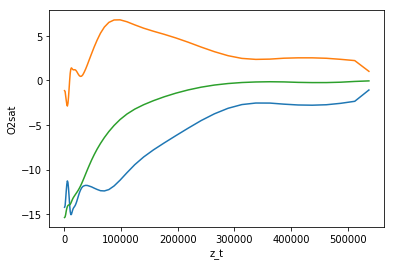

In [25]:
delta.O2[-1,:].plot(); delta.AOU[-1,:].plot(); delta.O2sat[-1,:].plot()

In [26]:
delta['AOU_circulation'] = delta.IAGE * baseline.OUR
delta['AOU_our'] = baseline.IAGE * delta.OUR
delta['AOU_est'] = delta.AOU_circulation + delta.AOU_our

delta.AOU_est.plot() ; delta.AOU.plot()

AttributeError: 'Dataset' object has no attribute 'OUR'

In [ ]:
plot_name = os.path.join(diro['fig'],'cesm_o2_change_profile.pdf')

fig = plt.figure(dpi=300,figsize=(4,6),facecolor='w')
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])

ax.plot(delta.O2[-1,:],delta.z_t*1e-2,label='Total O$_2$ change')
ax.plot(-delta.AOU[-1,:],delta.z_t*1e-2,label='Respiration-driven')
ax.plot(delta.O2sat[-1,:],delta.z_t*1e-2,label='Solubility-driven')

ax.axvline(x=0,linewidth=0.5,color='k',zorder=-10)

ax.set_ylim((5000,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Dissolved oxygen change [mmol m$^{-3}$]')